<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим-количество-дубликатов" data-toc-modified-id="Проверим-количество-дубликатов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверим количество дубликатов</a></span></li><li><span><a href="#Посмотрим-на-числовые-значения-в-фреймах" data-toc-modified-id="Посмотрим-на-числовые-значения-в-фреймах-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Посмотрим на числовые значения в фреймах</a></span></li><li><span><a href="#Рассчитаем-эффективность-обогащения-чернового-концентрата-rougher.output.recovery-(MAE)" data-toc-modified-id="Рассчитаем-эффективность-обогащения-чернового-концентрата-rougher.output.recovery-(MAE)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Рассчитаем эффективность обогащения чернового концентрата rougher.output.recovery (MAE)</a></span></li><li><span><a href="#Выделение-ключевых-столбцов-для-модели-и-их-обработка" data-toc-modified-id="Выделение-ключевых-столбцов-для-модели-и-их-обработка-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выделение ключевых столбцов для модели и их обработка</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Анализ-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Лучшие-результаты-на-тренировочной-выборке" data-toc-modified-id="Лучшие-результаты-на-тренировочной-выборке-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Лучшие результаты на тренировочной выборке</a></span></li><li><span><a href="#Финальная-ошибка-на-тестовой-выборке" data-toc-modified-id="Финальная-ошибка-на-тестовой-выборке-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Финальная ошибка на тестовой выборке</a></span></li><li><span><a href="#Константная-модель,-сравнение,-анализ." data-toc-modified-id="Константная-модель,-сравнение,-анализ.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Константная модель, сравнение, анализ.</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Технологический процесс
![](https://pictures.s3.yandex.net/resources/viruchka_1576238830.jpg)

# Описание данных

**Технологический процесс**
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    - Xanthate — ксантогенат (промотер, или активатор флотации);
    - Sulphate — сульфат (на данном производстве сульфид натрия);
    - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов**
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

## Подготовка данных

In [1]:
# Загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.pipeline import  make_pipeline
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Подгрузим данные и посмотрим по ним информацию
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
#df_train.head()

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [15]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


### Проверим количество дубликатов

In [16]:
df_test.duplicated().sum()

0

In [17]:
df_train.duplicated().sum()

0

In [18]:
df_full.duplicated().sum()

0

### Посмотрим на числовые значения в фреймах

In [19]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [20]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [21]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


В таком виде сложно понять какое кол-во пропусков присутсвует во фреймах, так что напишем функцию, которая покажет нам это

In [22]:
def show_isna(df):
    for column in df.columns:
        print('Количество пропусков в каждом столбце')    
        print(df.isna().mean())

In [23]:
show_isna(df_test)

Количество пропусков в каждом столбце
date                                          0.000000
primary_cleaner.input.sulfate                 0.051571
primary_cleaner.input.depressant              0.048497
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.028347
primary_cleaner.state.floatbank8_a_air        0.002732
primary_cleaner.state.floatbank8_a_level      0.002732
primary_cleaner.state.floatbank8_b_air        0.002732
primary_cleaner.state.floatbank8_b_level      0.002732
primary_cleaner.state.floatbank8_c_air        0.002732
primary_cleaner.state.floatbank8_c_level      0.002732
primary_cleaner.state.floatbank8_d_air        0.002732
primary_cleaner.state.floatbank8_d_level      0.002732
rougher.input.feed_ag                         0.002732
rougher.input.feed_pb                         0.002732
rougher.input.feed_rate                       0.006831
rougher.input.feed_size                       0.003757
rougher.input.feed_sol     

In [24]:
show_isna(df_train)

Количество пропусков в каждом столбце
date                                          0.000000
final.output.concentrate_ag                   0.004270
final.output.concentrate_pb                   0.004270
final.output.concentrate_sol                  0.021945
final.output.concentrate_au                   0.004211
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.005042
secondary_cleaner.state.floatbank5_b_air      0.005042
secondary_cleaner.state.floatbank5_b_level    0.004982
secondary_cleaner.state.floatbank6_a_air      0.006109
secondary_cleaner.state.floatbank6_a_level    0.005042
Length: 87, dtype: float64
Количество пропусков в каждом столбце
date                                          0.000000
final.output.concentrate_ag                   0.004270
final.output.concentrate_pb                   0.004270
final.output.concentrate_sol                  0.021945
final.output.concentrate_au                   0.004211
                 

In [25]:
show_isna(df_full)

Количество пропусков в каждом столбце
date                                          0.000000
final.output.concentrate_ag                   0.003918
final.output.concentrate_pb                   0.003830
final.output.concentrate_sol                  0.016948
final.output.concentrate_au                   0.003786
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.004446
secondary_cleaner.state.floatbank5_b_air      0.004446
secondary_cleaner.state.floatbank5_b_level    0.004402
secondary_cleaner.state.floatbank6_a_air      0.005239
secondary_cleaner.state.floatbank6_a_level    0.004446
Length: 87, dtype: float64
Количество пропусков в каждом столбце
date                                          0.000000
final.output.concentrate_ag                   0.003918
final.output.concentrate_pb                   0.003830
final.output.concentrate_sol                  0.016948
final.output.concentrate_au                   0.003786
                 

### Рассчитаем эффективность обогащения чернового концентрата rougher.output.recovery (MAE)

Эффективность обогащения рассчитывается по формуле

![](https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg)

- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Для того чтобы не выдавало `ValueError: Input contains NaN, infinity or a value too large for dtype('float64').`  удалим пропуски из столбцов со значением NaN

In [26]:
df_train.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au',
                                   'rougher.output.tail_au','rougher.output.recovery'], inplace=True)

In [27]:
concentrate_au_column = df_train['rougher.output.concentrate_au']
feed_au_column = df_train['rougher.input.feed_au']
tail_au_column = df_train['rougher.output.tail_au']
input_recovery = df_train['rougher.output.recovery']
calculated_recovery = (concentrate_au_column * (feed_au_column - tail_au_column) / feed_au_column 
                        / (concentrate_au_column - tail_au_column) * 100)
print('Эффективность обогащения чернового концентрата', calculated_recovery)
print('Абсолютная средняя ошибка =', mean_absolute_error(input_recovery, calculated_recovery))

Эффективность обогащения чернового концентрата 0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64
Абсолютная средняя ошибка = 1.035865202282935e-14


MAE имеет очень малое отклонение - это значит, что расчетное значение rougher.output.recovery совпадает с данными из столбца.

Также подготовим данные по другим фреймам

In [28]:
good_df_train = df_train.dropna()
good_df_train.isna().mean()

date                                          0.0
final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 87, dtype: float64

In [29]:
good_df_test = df_test.dropna()
good_df_test.isna().mean()

date                                          0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0


**Вывод** Исходя из задания `Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.` Скорее всего столбцы этапов `rougher.output`, `rougher.calculation`, `final.output`, `primary_cleaner.output` и `secondary_cleaner.output` отсутсвуют в тестовой выборке, так как заполняются после тех. процессов

In [30]:
good_df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [31]:
good_df_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

### Выделение ключевых столбцов для модели и их обработка

Выделим столбцы из тестовой выборки, по которым будем обучать модель

In [32]:
features_columns = good_df_test.columns[1:] # Оставим все столбцы кроме data, так как не несет никаког осмысла для обучения
rougher_features_columns = set(features_columns[12:34]) # Для предсказания rougher.output.recovery используем данные
#из стобцов rougher
final_features_columns = set(features_columns) # Тут будем использовать все столбцы из тестовой выборки
print(rougher_features_columns)
print('------------')
print(final_features_columns)

{'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_b_air', 'rougher.input.feed_rate', 'rougher.input.feed_pb', 'rougher.state.floatbank10_c_level', 'rougher.input.feed_size', 'rougher.input.floatbank10_xanthate', 'rougher.input.feed_ag', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_level', 'rougher.input.floatbank11_sulfate', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_a_air', 'rougher.input.feed_sol', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_f_air', 'rougher.input.floatbank10_sulfate', 'rougher.state.floatbank10_d_level', 'rougher.input.feed_au', 'rougher.state.floatbank10_d_air'}
------------
{'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_c_air', 'secondary_cleaner.state.floatbank2_a_air', 'rougher.state.floatbank10_b_air', 'secondary_cleaner.state.floatbank5_a_air', 'secondary_cleaner.state.floatbank3_a_air', 'primary_

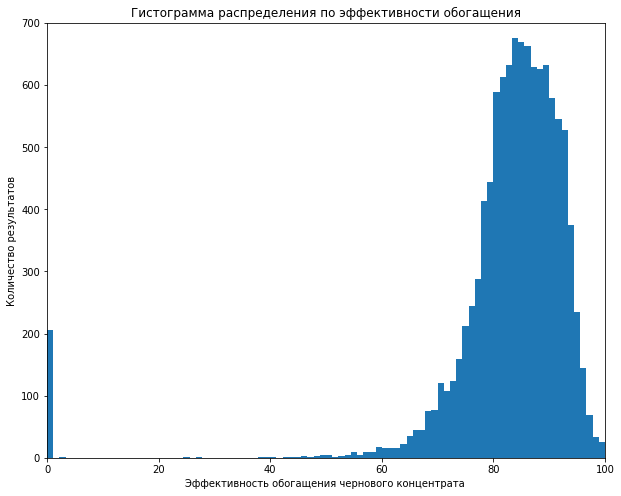

In [33]:
plt.figure(figsize=[10,8])

plt.hist(good_df_train['rougher.output.recovery'], bins=90)

plt.xlim([0, 100])
plt.ylim([0, 700])

plt.xlabel("Эффективность обогащения чернового концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

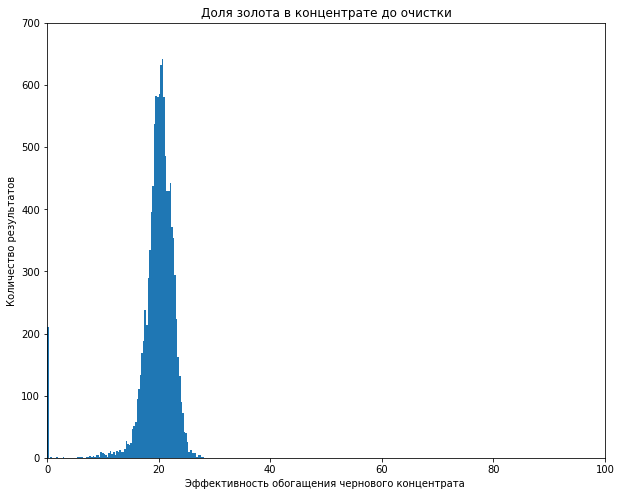

In [34]:
plt.figure(figsize=[10,8])

plt.hist(good_df_train['rougher.output.concentrate_au'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 700])

plt.xlabel("Эффективность обогащения чернового концентрата ")
plt.ylabel("Количество результатов")

plt.title("Доля золота в концентрате до очистки")
plt.show()

На гистограмме виидм довольно много нулевых результатов, нужно рассмотреть их поподробнее и возможно убрать.

In [35]:
good_df_train[good_df_train['rougher.output.recovery'] < 1].head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
51,2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112


In [36]:
good_df_train[good_df_train['rougher.output.concentrate_au'] < 1].head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
51,2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112


Видим, что по столбцам где проходит этап rougher нет никаких данных, следовательно можем их удалить.

In [37]:
good_df_train = good_df_train.drop(good_df_train[good_df_train['rougher.output.recovery'] == 0].index)
good_df_train[good_df_train['rougher.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


Все ок, в данных теперь нет нулевых значений

In [38]:
# Проверка
#plt.figure(figsize=[10,8])

#plt.hist(good_df_train['rougher.output.recovery'], bins=90)

#plt.xlim([0, 100])
#plt.ylim([0, 700])

#plt.xlabel("Эффективность обогащения чернового концентрата ")
#plt.ylabel("Количество результатов")

#plt.title("Гистограмма распределения по эффективности обогащения")
#plt.show()

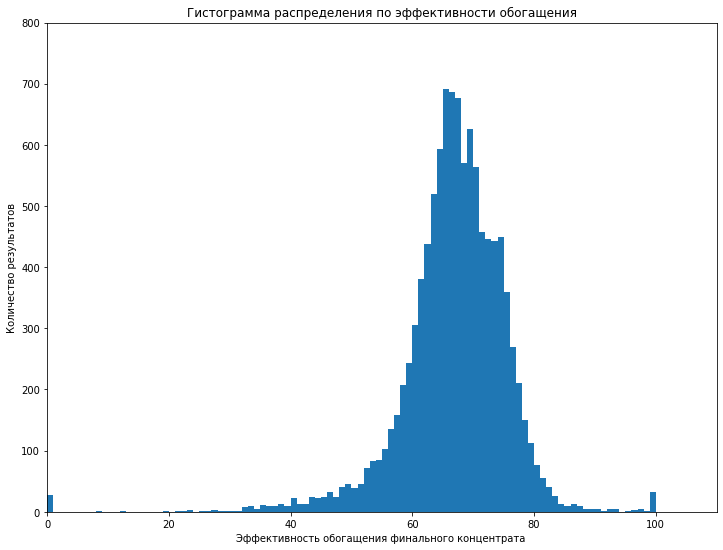

In [39]:
# Построим гистограмму эффективности финального концентрата с обработанными данными
plt.figure(figsize=[12,9])

plt.hist(good_df_train['final.output.recovery'], bins=100)

plt.xlim([0, 110])
plt.ylim([0, 800])

plt.xlabel("Эффективность обогащения финального концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

In [40]:
# Аналогично видим нулевые занчнеия, рассмотрим их поближе и по возможности удалим
good_df_train[good_df_train['final.output.recovery'] < 1].head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
707,2016-02-13 11:00:00,0.0,0.0,0.0,0.0,0.0,8.894029,0.843584,15.417342,1.779052,...,21.991762,-399.587122,21.988937,-401.366408,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808
1354,2016-03-11 10:00:00,0.0,0.0,0.0,0.0,0.0,10.817313,1.462800,16.407607,2.984504,...,11.979352,-453.431061,12.003445,-450.179844,11.982937,-449.856468,9.927727,-450.521700,19.971682,-500.685521
1355,2016-03-11 11:00:00,0.0,0.0,0.0,0.0,0.0,10.436792,1.207636,17.800392,2.747294,...,12.034636,-446.590944,12.130405,-449.684812,11.844983,-450.881424,9.916784,-449.542871,20.004767,-500.137068


In [41]:
# Также видим что отсутсвуют данные в столбцах rougher, следоавательно можеи их удалить
good_df_train = good_df_train.drop(good_df_train[good_df_train['final.output.recovery'] == 0].index)
good_df_train[good_df_train['final.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [42]:
# Получили ровный датафрейм, который не содержит нулевые значения важных для нашей модели
good_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10784 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                10784 non-null  object 
 1   final.output.concentrate_ag                         10784 non-null  float64
 2   final.output.concentrate_pb                         10784 non-null  float64
 3   final.output.concentrate_sol                        10784 non-null  float64
 4   final.output.concentrate_au                         10784 non-null  float64
 5   final.output.recovery                               10784 non-null  float64
 6   final.output.tail_ag                                10784 non-null  float64
 7   final.output.tail_pb                                10784 non-null  float64
 8   final.output.tail_sol                               10784 non-null  float64


### Вывод

По итогу подготвки данных были обнаружены такие аномалии:
- Пропущенные значения
- Нулевые значения в ключевых столбцах для нашей модели

Были удалены значения которые могли повлият на работу нашей модели (эти данные либо еще не занесли, либо еще не были получены)
Далее можно перейти к анализу данных

## Анализ данных

Построим гистограммы вещест, чтобы посмотреть на их концентрацию на каждом этапе, по идем с каждым этапом концентрация растет. Проверим,

### Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки

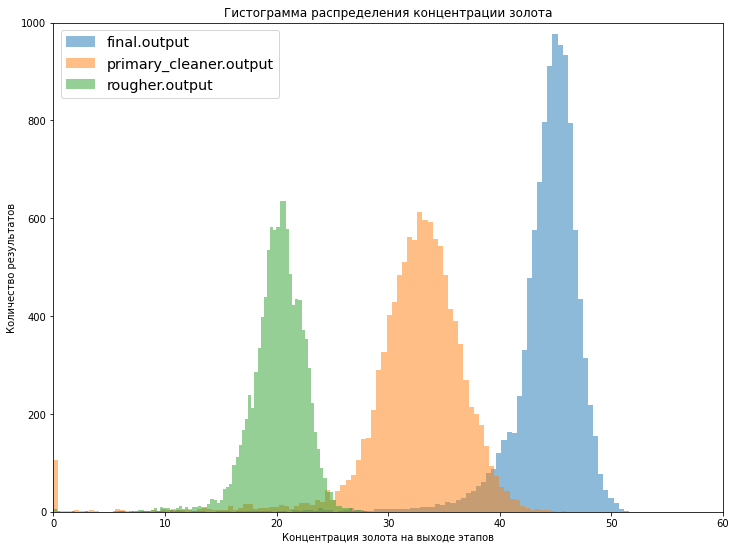

In [43]:
# Золото
plt.figure(figsize=[12,9])

plt.hist(good_df_train['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=.5)
plt.hist(good_df_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_df_train['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 60])
plt.ylim([0, 1000])

plt.xlabel("Концентрация золота на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации золота")
plt.show()

**Вывод** 
https://ru.wikipedia.org/wiki/%D0%A4%D0%BB%D0%BE%D1%82%D0%B0%D1%86%D0%B8%D1%8F

На гистограмме видим что концентарция золота повышается с каждым этапом. То есть с помощью флотации мы обогащаем золото.

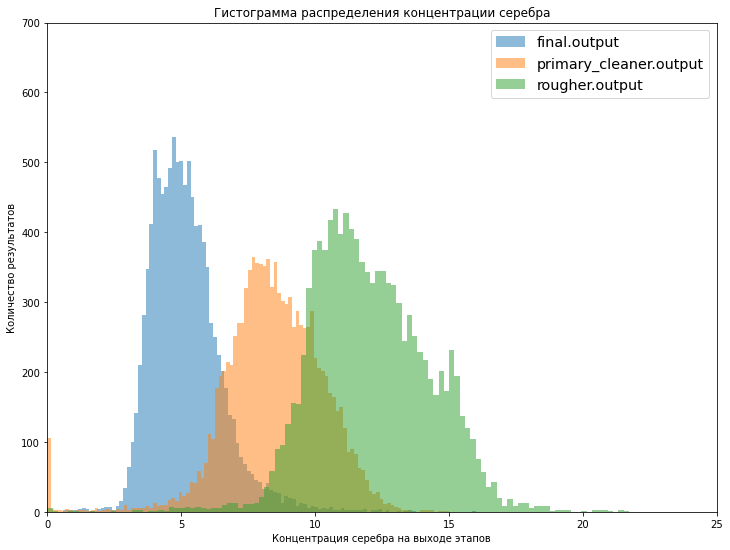

In [44]:
# Серебро
plt.figure(figsize=[12,9])

plt.hist(good_df_train['final.output.concentrate_ag'], bins=110, label = 'final.output', alpha=.5)
plt.hist(good_df_train['primary_cleaner.output.concentrate_ag'], bins=110, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_df_train['rougher.output.concentrate_ag'], bins=110, label = 'rougher.output', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 700])

plt.xlabel("Концентрация серебра на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper right', fontsize='x-large')

plt.title("Гистограмма распределения концентрации серебра")
plt.show()

Концентрация серебра понижается, ввиду того, что нас интересует золото, скорее всего другие материалы отделяются от сплава фильтруются или сортируются в нужном количестве. (Прим. справа, налево)

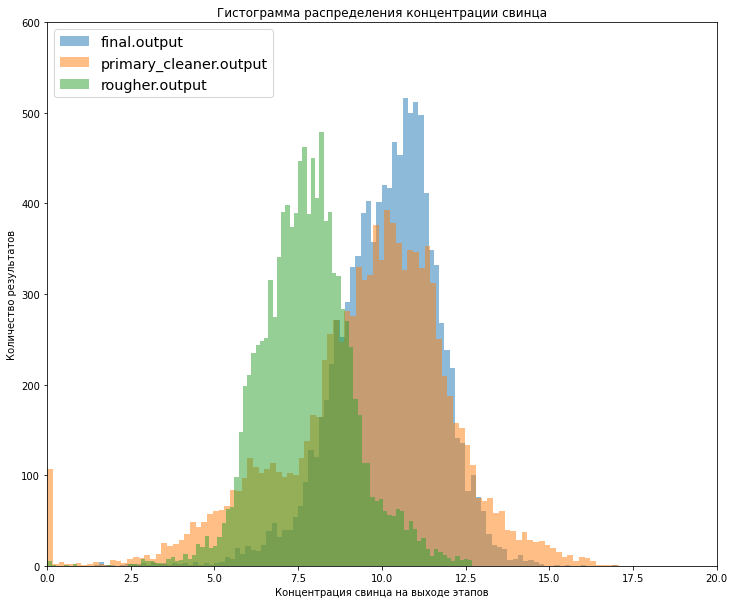

In [45]:
plt.figure(figsize=[12,10])

plt.hist(good_df_train['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
plt.hist(good_df_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(good_df_train['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 600])

plt.xlabel("Концентрация свинца на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации свинца")
plt.show()

Так, если честно сложно понять, но выглядит что все таки на пересечении концентрация свинац растет.

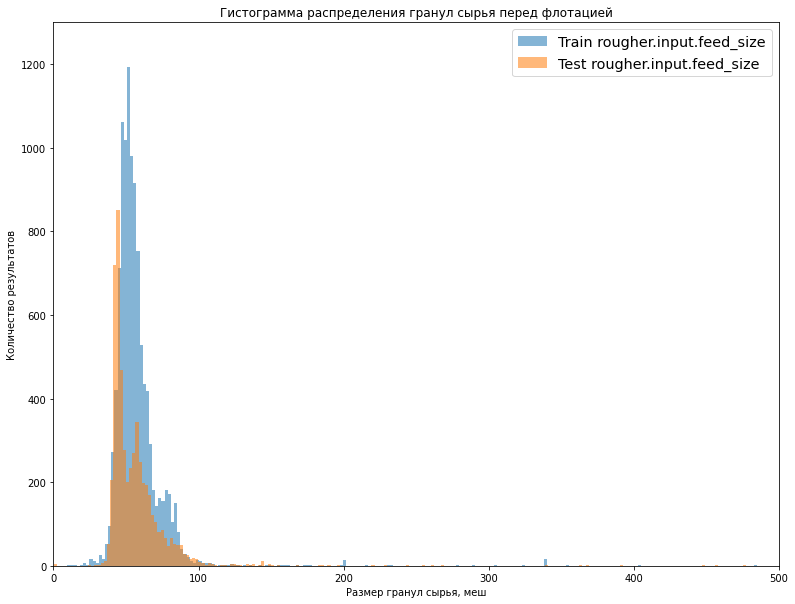

In [46]:
# Перед флотацией
plt.figure(figsize=[13,10])

plt.hist(good_df_train['rougher.input.feed_size'], bins=220, label = 'Train rougher.input.feed_size', alpha=.55)
plt.hist(good_df_test['rougher.input.feed_size'], bins=220, label = 'Test rougher.input.feed_size', alpha=.55)

plt.xlim([0, 500])
plt.ylim([0, 1300])

plt.xlabel("Размер гранул сырья, меш")
plt.ylabel("Количество результатов")

plt.legend(loc='upper right', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед флотацией")
plt.show()

В целом видем нормальное распеделение со смещение влево, также после 110 видим много выбросов

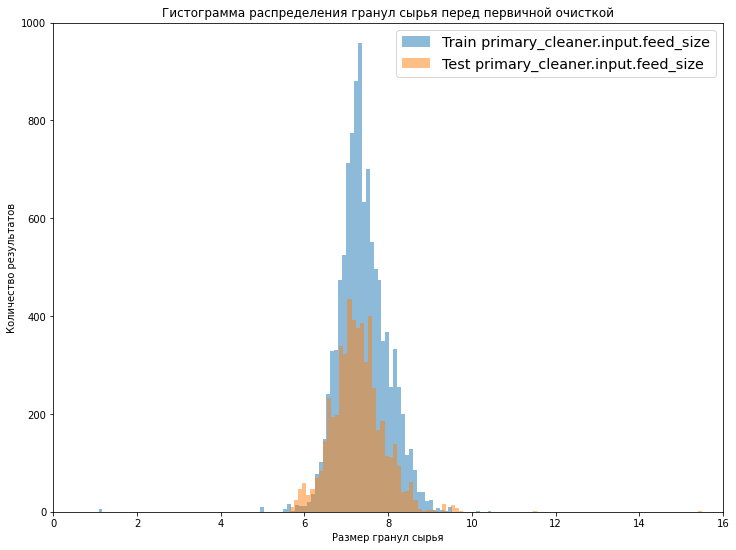

In [47]:
# Перед первичной очисткой
plt.figure(figsize=[12,9])

plt.hist(good_df_train['primary_cleaner.input.feed_size'], bins=100, label = 'Train primary_cleaner.input.feed_size', alpha=.5)
plt.hist(good_df_test['primary_cleaner.input.feed_size'], bins=100, label = 'Test primary_cleaner.input.feed_size', alpha=.5)

plt.xlim([0, 16])
plt.ylim([0, 1000])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper right', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед первичной очисткой")
plt.show()

В целом видем нормальное распеделение, размер нормализовался.
Подготовим столбцы с концентрациями всех материалов в обучающей выборке по этапам и построим гистограмму.

In [48]:
final_output_concentrate_sum_train = (good_df_train['final.output.concentrate_au'] + 
                                      good_df_train['final.output.concentrate_ag'] + 
                                      good_df_train['final.output.concentrate_pb'] +
                                      good_df_train['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum_train = (good_df_train['primary_cleaner.output.concentrate_au'] + 
                                                good_df_train['primary_cleaner.output.concentrate_ag'] + 
                                                good_df_train['primary_cleaner.output.concentrate_pb'] +
                                                good_df_train['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_sum_train = (good_df_train['rougher.output.concentrate_au'] + 
                                        good_df_train['rougher.output.concentrate_ag'] + 
                                        good_df_train['rougher.output.concentrate_pb'] +
                                        good_df_train['rougher.output.concentrate_sol'])

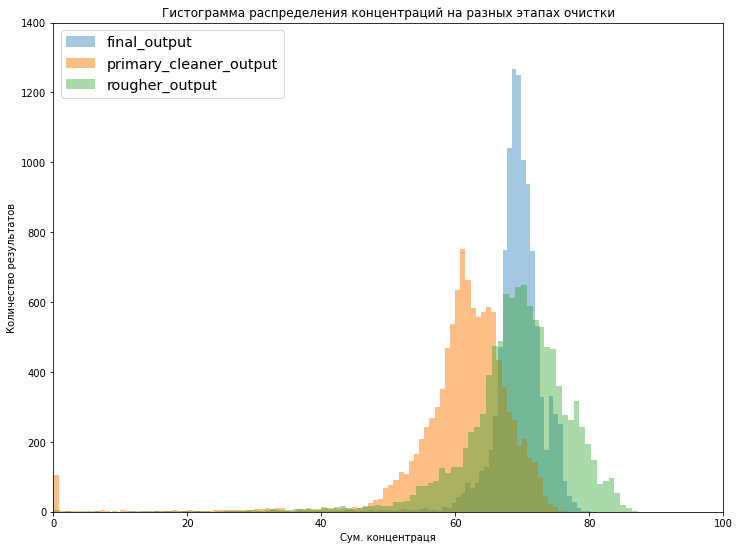

In [49]:
plt.figure(figsize=[12,9])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'final_output', alpha=.4)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'rougher_output', alpha=.4)

plt.xlim([0, 100])
plt.ylim([0, 1400])

plt.xlabel("Сум. концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

Видим довольно много аномалий в нулевых значениях, нужно их обработать.

In [50]:
#Посмотрим сколько их
good_df_train[good_df_train['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count()

109

In [51]:
# Так как это аномалии, удаляем их
good_df_train = good_df_train.drop(good_df_train[good_df_train['primary_cleaner.output.concentrate_au'] == 0].index)
good_df_train[good_df_train['primary_cleaner.output.concentrate_au'] == 0].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


### Вывод

В результате анализа были изучены:

- Концентрация металлов (Au, Ag, Pb) на разных этапах очистки.
- Размер гранул сырья на обучающей и тестовой выборках
- Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
- Найдены и обработаны аномалии. Данные готовы к обучению.

## Модель

In [52]:
def sMAPE(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

In [53]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [54]:
# Подготовка признаков для final.output.recovery
columns_to_delete = set(good_df_train.columns) - final_features_columns
print(columns_to_delete)
train_features_dataset_final = good_df_train.drop(columns_to_delete, axis=1)
print()
print(train_features_dataset_final.columns)

# Подготовка признаков для rougher.output.recovery
columns_to_delete = set(train_features_dataset_final.columns) - rougher_features_columns
print(columns_to_delete)
train_features_dataset_rougher = train_features_dataset_final.drop(columns_to_delete, axis=1)
print()
print(train_features_dataset_rougher.columns)

{'primary_cleaner.output.tail_ag', 'rougher.output.concentrate_pb', 'final.output.tail_sol', 'rougher.output.tail_pb', 'secondary_cleaner.output.tail_au', 'rougher.output.concentrate_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_ag', 'rougher.calculation.au_pb_ratio', 'secondary_cleaner.output.tail_sol', 'final.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.output.tail_sol', 'final.output.concentrate_ag', 'final.output.tail_ag', 'primary_cleaner.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.tail_au', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'rougher.output.recovery', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'rougher.output.tail_au', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_pb', 'rougher.output.tail_ag', 'final.output.concentrate_au', 'rougher.calculation.sulfate_to_au_concentrate', 'final.output.concentrate_sol', 'd

In [55]:
train_target_dataset_rougher = good_df_train['rougher.output.recovery']
train_target_dataset_final = good_df_train['final.output.recovery']

In [56]:
test_features = good_df_test.drop('date', axis=1)
#test_features.columns

In [57]:
test_features_final = test_features
columns_to_delete = set(test_features_final.columns) - rougher_features_columns
#print(columns_to_delete)
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)

In [58]:
test_features_rougher.shape

(5383, 22)

In [59]:
# Cчетчик функции
custom_score = make_scorer(sMAPE,greater_is_better=False)

In [60]:
model = make_pipeline(StandardScaler(),RandomForestRegressor())
model2 = make_pipeline(StandardScaler(),DecisionTreeRegressor())

In [61]:
# Инициализация параметров для GridSearchCV
params_RF = {"randomforestregressor__n_estimators":[5,100],
             "randomforestregressor__max_depth":[1,10]}
params_DT= {"decisiontreeregressor__max_depth":[1,10]}

In [62]:
grid_rougher = GridSearchCV(model,param_grid = params_RF,scoring=custom_score)
grid_final = GridSearchCV(model,param_grid = params_RF,scoring=custom_score)
grid_rougher_DT = GridSearchCV(model2,param_grid = params_DT,scoring=custom_score)
grid_final_DT = GridSearchCV(model2,param_grid = params_DT,scoring=custom_score)

In [63]:
# Запускаем обучение
grid_rougher.fit(train_features_dataset_rougher,train_target_dataset_rougher)
grid_final.fit(train_features_dataset_final,train_target_dataset_final)
grid_rougher_DT.fit(train_features_dataset_rougher,train_target_dataset_rougher)
grid_final_DT.fit(train_features_dataset_final,train_target_dataset_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [1, 10]},
             scoring=make_scorer(sMAPE, greater_is_better=False))

In [64]:
print("Лучшие модели")
print(grid_rougher.best_estimator_)
print(grid_rougher.best_estimator_)
print(grid_rougher_DT.best_estimator_)
print(grid_final_DT.best_estimator_)

Лучшие модели
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=1))])


In [65]:
best_score_rougher = grid_rougher.best_score_
best_score_final = grid_final.best_score_
best_score_rougher_DT = grid_rougher_DT.best_score_
best_score_final_DT = grid_final_DT.best_score_

In [66]:
# Определяем лучшую модель для каждого целевого признака
print("rougher")
print("RandomForest",best_score_rougher,"DecisionTree",best_score_rougher_DT)
print("final")
print("RandomForest",best_score_final,"DecisionTree",best_score_final_DT)

rougher
RandomForest -6.318371222484672 DecisionTree -6.970277417780446
final
RandomForest -8.147701254038713 DecisionTree -8.211123544466659


**Вывод** лучше всег осправляется случайное дерево, так что остановим свой выбор на нем.

### Лучшие результаты на тренировочной выборке

In [67]:
# Финальный sMAPE RandomForest
final_sMAPE(best_score_rougher,best_score_final)

-7.690368746150202

In [68]:
# Финальный sMAPE DecisionTree
final_sMAPE(best_score_rougher_DT,best_score_final_DT)

-7.900912012795105

In [69]:
test_frame_for_target = good_df_test.merge(df_full.loc[:,['date',"rougher.output.recovery",
                                                           "final.output.recovery"]],on = 'date')

In [70]:
target_test_rougher = test_frame_for_target["rougher.output.recovery"]
target_test_final = test_frame_for_target["final.output.recovery"]

In [72]:
target_test_final, target_test_rougher

(0       70.273583
 1       68.910432
 2       68.143213
 3       67.776393
 4       61.467078
           ...    
 5378    68.919891
 5379    68.440582
 5380    67.092759
 5381    68.061186
 5382    71.699976
 Name: final.output.recovery, Length: 5383, dtype: float64,
 0       89.993421
 1       88.089657
 2       88.412756
 3       87.360133
 4       83.236367
           ...    
 5378    95.172585
 5379    94.575036
 5380    93.018138
 5381    92.599042
 5382    91.177695
 Name: rougher.output.recovery, Length: 5383, dtype: float64)

In [74]:
rougher_recovery_real = df_full.loc[not_nan_index,'rougher.output.recovery']
final_recovery_real = df_full.loc[test_features_final.index,'final.output.recovery']
not_nan_index = set(test_features_rougher.index)
not_nan_index = not_nan_index.intersection(set(final_recovery_real.index), set(rougher_recovery_real.index))

In [75]:
final_recovery_real = df_full.loc[not_nan_index,'final.output.recovery']
test_features_rougher = test_features_rougher.loc[not_nan_index,:]
test_features_final = test_features_final.loc[not_nan_index,:]

In [76]:
rogher_test = grid_rougher.predict(test_features_rougher)

In [77]:
final_test = grid_final.predict(test_features_final)

### Финальная ошибка на тестовой выборке

In [78]:
final_sMAPE(sMAPE(target_test_rougher,rogher_test),sMAPE(target_test_final,final_test))

9.191442373565621

### Константная модель, сравнение, анализ.

In [79]:
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(train_features_dataset_rougher,train_target_dataset_rougher)
dummy_rougher_pred = dummy_regressor_rougher.predict(rogher_test)
smape_dummy_rougher = sMAPE(target_test_rougher, dummy_rougher_pred)
print(smape_dummy_rougher) 

8.73749185616434


In [80]:
dummy_regressor_final = DummyRegressor(strategy="median")
dummy_regressor_final.fit(train_features_dataset_final,train_target_dataset_final)
dummy_final_pred = dummy_regressor_final.predict(final_test)
smape_dummy_final = sMAPE(target_test_final, dummy_final_pred)
print(smape_dummy_final) 

9.772234877523275


In [72]:
final = (smape_dummy_final + smape_dummy_rougher)/2
final

9.254863366843807

# Вывод

- Итоговая модель построена на алгоритме RandomForest
- Ошибка на тестовой выборке: 9.17, на константной 9.25
- Параметры алгоритма: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])


## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке